In [155]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df = pd.read_csv("car_data.csv")


In [157]:
df.drop("Car_Name", axis=1, inplace=True)

df.insert(0,"Age", df["Year"].max() + 1 - df["Year"])
df.drop('Year', axis=1, inplace=True)
df

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


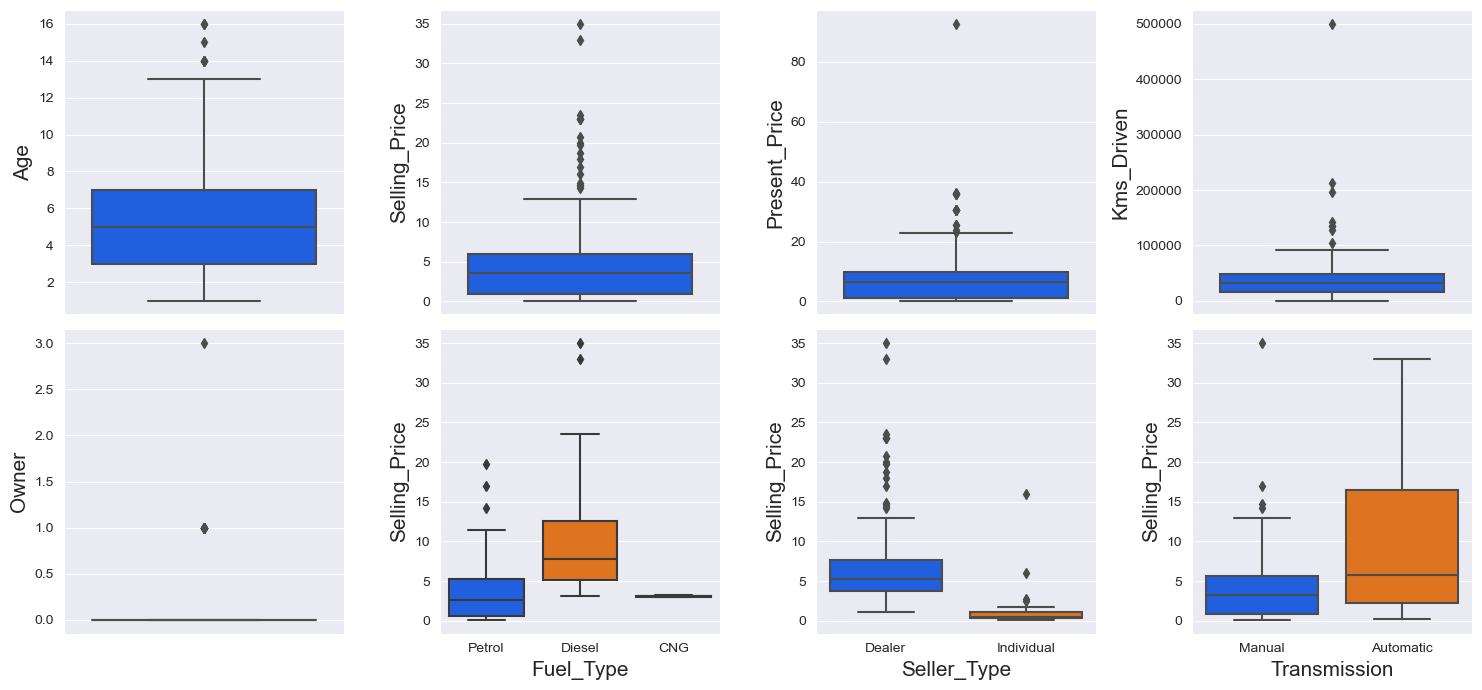

In [158]:

sns.set_style('darkgrid') # Gives the plots a dark background with gridlines.

colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors)) # Custom color palette

# That concatenates two lists of column names from the DataFrame df.
OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,  df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)
"""
row_grid and column_grid
dpi : dots per inch
"""

for i, col in enumerate(OrderedCols):
    # Method of this field
    x = i//4
    y = i%4
    if i<5: # numerical columns
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else: # categorical columns
        sns.boxplot(data=df, x=col, y='Selling_Price', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)
        
plt.tight_layout()    
plt.show()


In [159]:
outlier_index = []

# For categorical columns
target = "Selling_Price"
for col in df.select_dtypes(include="object").columns: # Each object columns
    for cat in df[col].unique(): # Each concrete row of current column
        sub_df = df[df[col] == cat]
        
        # IQR rule
        q1 = sub_df[target].quantile(0.25)
        q3 = sub_df[target].quantile(0.75)
        iqr = q3 - q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        
        # Get outlier
        outlier_df = sub_df[(sub_df[target] < minimum) | (sub_df[target] > maximum)]
        outlier_index.extend(outlier_df.index.tolist())

# For numerical columns
for col in df.select_dtypes(exclude="object").columns: # Each non_object columns
        # IQR rule
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        
        # Get outlier
        outlier_df = df[(df[col] < minimum) | (df[col] > maximum)]
        outlier_index.extend(outlier_df.index.tolist())

outlier_index = list(set(outlier_index))
print(outlier_index)
        

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


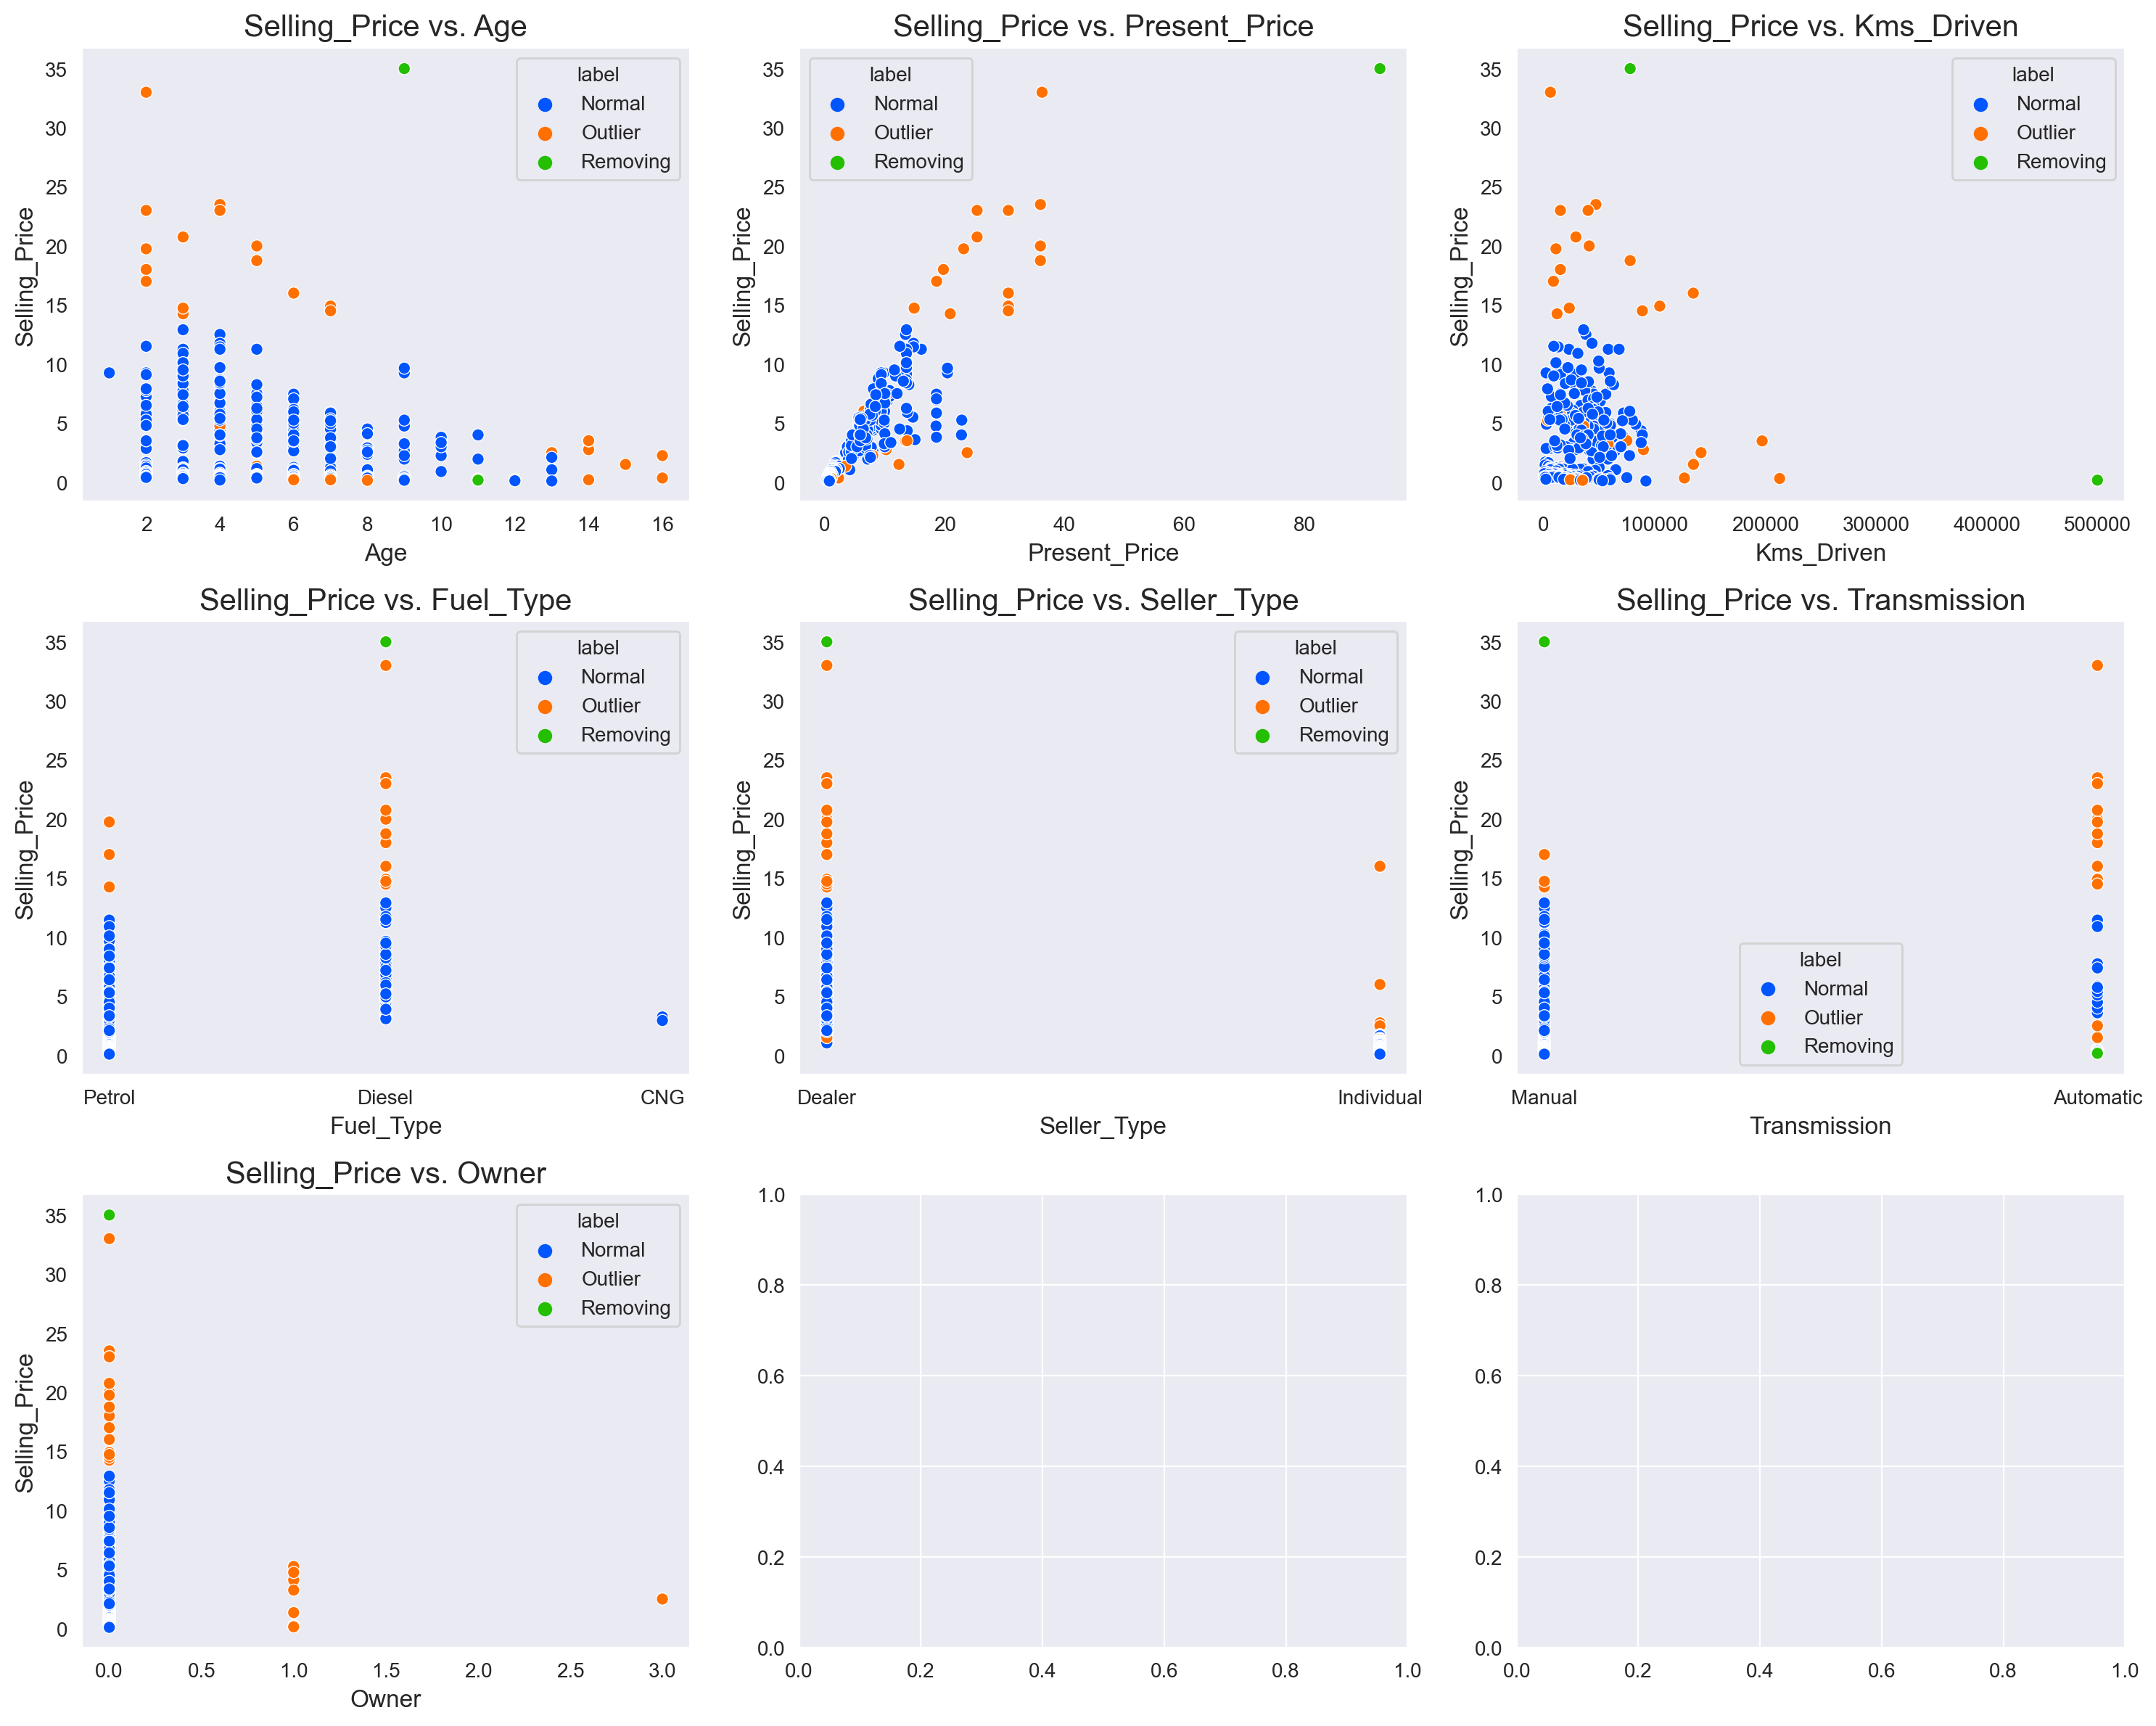

In [160]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target] > 33].index)
removing_indexes.extend(df1[df1['Kms_Driven'] > 400000].index)
df1.loc[removing_indexes,'label'] = 'Removing'

# Plot
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()
"""
ax[2, 1].axis('off')
ax[2, 2].axis('off')
"""
plt.tight_layout()
plt.show()


In [161]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Bivariate Analysis

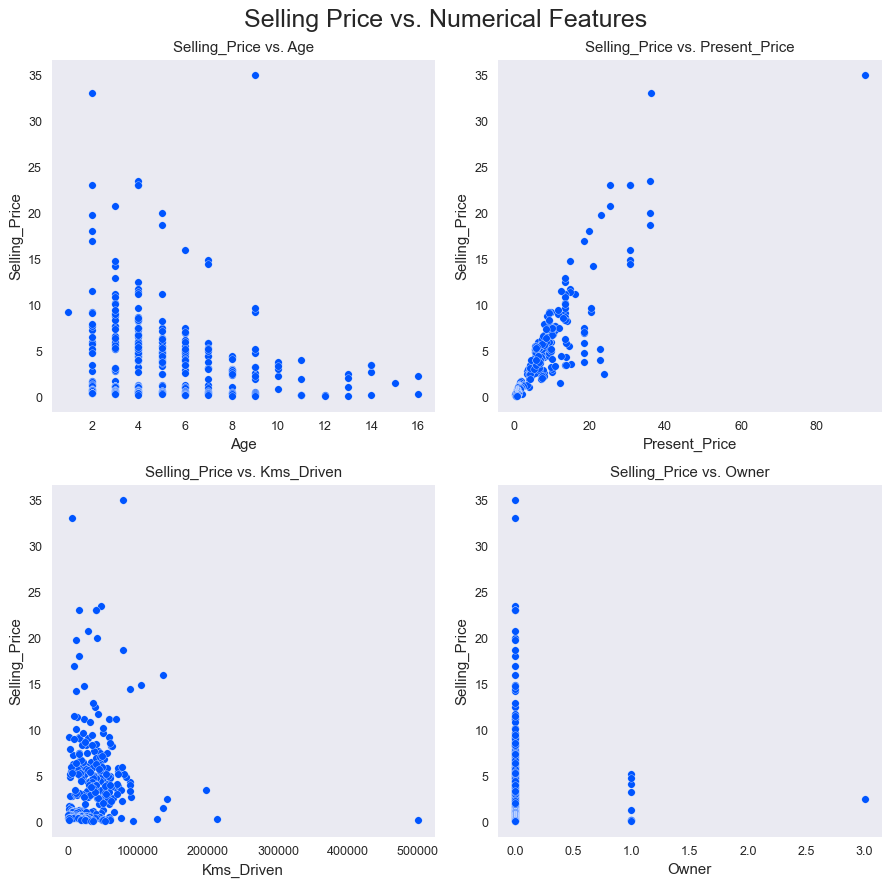

In [162]:
# Selling Price vs. Numerical Features
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
# num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
num_features = df.select_dtypes(exclude="object").columns.drop(target)

c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()


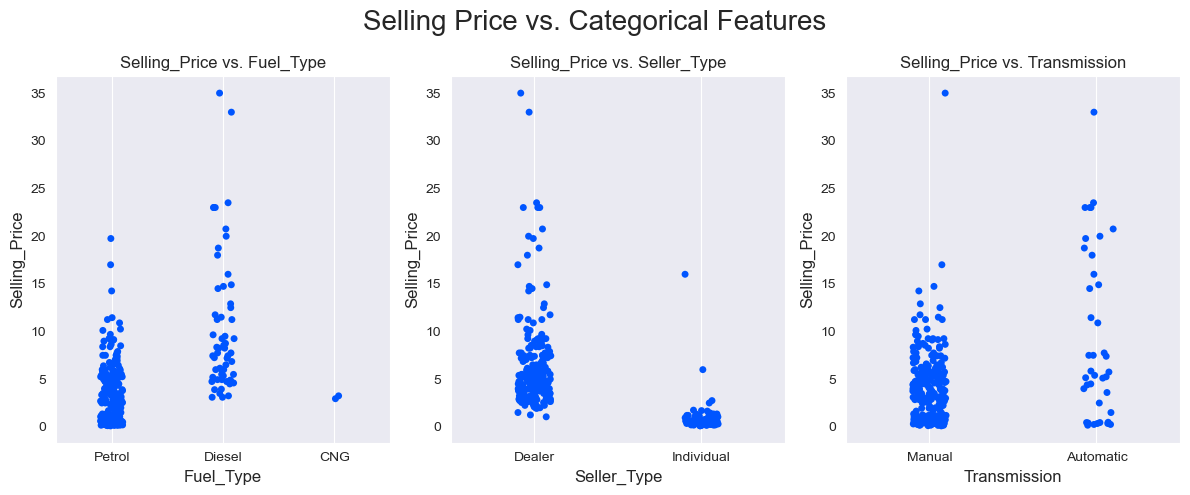

In [163]:
# Selling Price vs. Categorical Features
fig, ax = plt.subplots(nrows=1 ,ncols=3, figsize=(12, 5), dpi=100)
target = 'Selling_Price'
cat_features = df.select_dtypes(include="object").columns

c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(x=df1[cat_features[i]], y=df1[target], color=c, ax=ax[i])
    ax[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 12)
    ax[i].set_xlabel(cat_features[i], size = 12)
    ax[i].set_ylabel(target, size = 12)
    ax[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()


# Categorical Variables Encoding

In [179]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

df_ = pd.get_dummies(df1, columns=CatCols, drop_first=True)
print(df_.head(5))
print(df1.head(5))

   Age  Selling_Price  Present_Price  Kms_Driven  Owner   label  \
0    5           3.35           5.59       27000      0  Normal   
1    6           4.75           9.54       43000      0  Normal   
2    2           7.25           9.85        6900      0  Normal   
3    8           2.85           4.15        5200      0  Normal   
4    5           4.60           6.87       42450      0  Normal   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
   Age  Selling_Price  Present_Price  Kms_Driven Fuel_Ty

In [180]:
print(df_.head(5))

   Age  Selling_Price  Present_Price  Kms_Driven  Owner   label  \
0    5           3.35           5.59       27000      0  Normal   
1    6           4.75           9.54       43000      0  Normal   
2    2           7.25           9.85        6900      0  Normal   
3    8           2.85           4.15        5200      0  Normal   
4    5           4.60           6.87       42450      0  Normal   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  


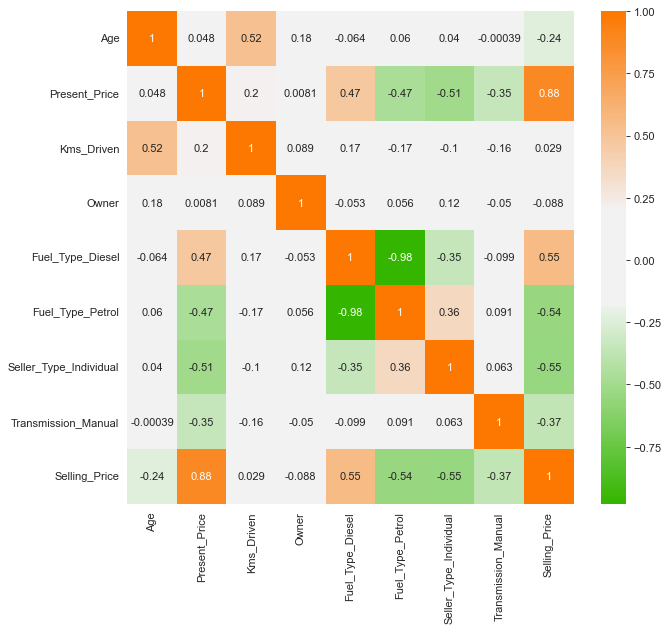

In [181]:
target = 'Selling_Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df_.drop(target,axis=1), df_[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()